*Курсив*# Практическая работа. Модуль 3

В этой практической работе мы рассмотрим применение символьных и численных расчётов при помощи Python и его библиотек (SymPy, NumPy, SciPy).

Не забудьте запустить следующую ячейку, чтобы импортировать библиотеки.

In [2]:
import numpy as np
import sympy
import scipy
import matplotlib.pyplot as plt

## Задание 1. Создание массивов

Для начала попробуем создать NumPy-массив, в котором будет четыре элемента: -1, 3, -2, 5.

In [3]:
# Создаём массив
arr = np.array([-1, 3, -2, 5])

# Выводим массив на экран
print(arr)

[-1  3 -2  5]


Попробуем найти сумму и произведение элементов этого массива. Для этого запустите ячейку ниже.

In [4]:
print(f"Сумма элементов массива = {np.sum(arr)}")
print(f"Произведение элементов массива = {np.prod(arr)}")

Сумма элементов массива = 5
Произведение элементов массива = 30


Вывод ячейки должен выглядеть следующим образом:

Сумма элементов массива = 5

Произведение элементов массива = 30

Замечательная особенность этих массивов — возможность применять обычные операции как покомпонентные. Например, мы можем найти квадраты всех элементов массива путём возведения его в степень по обычным синтаксическим правилам Python.

In [5]:
squared_array = arr**2
print(squared_array)

[ 1  9  4 25]


Запустите эту ячейку, чтобы вычислить squared_error. Затем найдите сумму квадратов элементов массива и выведите её в таком же формате, как и в ячейке выше.

In [6]:
print(f"Сумма элементов массива = {np.sum(squared_array)}")

Сумма элементов массива = 39


Вывод ячейки должен составлять:

Сумма элементов массива = 39

## Задание 2. Случайные массивы

Ещё один способ создания массивов состоит в использовании случайных чисел. Библиотека NumPy поддерживает пакет random, позволяющий генерировать наборы чисел случайным образом из различных вероятностных распределений.

Рассмотрим пример создания массива из пяти целых чисел в отрезке [-10, 10].

In [7]:
rand_arr = np.random.randint(low=-10, high=10, size=5)
print(rand_arr)

[ 5 -7  4 -8 -9]


Такой подход позволяет в том числе создавать случайные массивы, обладающие определёнными свойствами. Например, мы можем сгенерировать массив, сумма элементов которого равна нулю. Вот как это можно сделать:

In [8]:
while True:
  rand_arr = np.random.randint(low=-10, high=10, size=5)
  if np.sum(rand_arr) == 0:
    break
print("Случайный массив:", rand_arr)
print("Сумма элементов:", np.sum(rand_arr))

Случайный массив: [ 2  8  0 -9 -1]
Сумма элементов: 0


Запустите эту ячейку множество раз, и вы увидите, что каждый раз с большой долей вероятности вы будете получать разные массивы, но их общее свойство будет сохраняться.

## Задание 3. Случайные матрицы

Теперь попробуем таким же образом сгенерировать матрицу (двумерный массив) таким образом, что её определитель будет равен единице.

Построенная матрица должна быть пятого порядка. Для этого в аргумент size нужно передать кортеж (5,5). Для увеличения скорости поиска матрицы с нужными свойствами рекомендуется выбирать случайные числа из отрезка [-2, 2].

Для вычисления самого определителя необходимо воспользоваться функцией np.linalg.det(matrix).

In [14]:
while True:
  matrix = np.random.randint(low=-2, high=2, size=(5,5))
  if np.linalg.det(matrix) == 1:
    break
print("Случайная матрица:\n", matrix)
print("Определитель матрицы:", np.linalg.det(matrix))

Случайная матрица:
 [[ 0  0 -1 -2  1]
 [ 1 -2 -2 -1  0]
 [ 0  0  1  0 -2]
 [ 1 -2 -1 -2 -2]
 [ 1 -1 -2 -2 -2]]
Определитель матрицы: 1.0


Кроме того, пользуясь возможностями библиотеки (метод np.linalg.inv()), мы можем найти обратную матрицу к matrix.

In [15]:
matrix_inv = np.linalg.inv(matrix)
print("Обратная матрица:\n", matrix_inv)

Обратная матрица:
 [[ -8. -14. -19.  13.   2.]
 [ -2.  -4.  -5.   3.   1.]
 [ -2.  -4.  -5.   4.   0.]
 [ -0.   1.   1.  -1.  -0.]
 [ -1.  -2.  -3.   2.   0.]]


По свойствам умножения матриц их произведение должно дать единичную матрицу. Убедимся в этом.

Воспользуйтесь методом A.dot(B), который выполняет умножение AxB.

In [16]:
result = matrix.dot(matrix_inv)  # Умножаем matrix на matrix_inv
print(result)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


Обратите внимание, что из-за ограниченности памяти типов данных, которые использует NumPy, могут возникать небольшие отличия от нуля вне диагональных элементов порядка 1e-15.

## Задание 4. Матрицы SymPy

Библиотека NumPy преимущественно подходит к операциям с точки зрения численных методов. В противоположность ей библиотека SymPy позволяет работать с математическими объектами с точки зрения символьных вычислений.

С этими двумя библиотеками можно работать в связке при помощи преобразования типов. Например, уже полученную с помощью случайных чисел матрицу мы можем преобразовать в матричный тип библиотеки SymPy.

In [17]:
sympy_matrix = sympy.Matrix(matrix)
sympy_matrix

Matrix([
[0,  0, -1, -2,  1],
[1, -2, -2, -1,  0],
[0,  0,  1,  0, -2],
[1, -2, -1, -2, -2],
[1, -1, -2, -2, -2]])

Можно заметить, что вывод матрицы при помощи SymPy более красивый. Вместе с тем с ними можно выполнять те же самые операции. Например, возведём эту матрицу в квадрат. Для этого можно воспользоваться стандартной операцией возведения в степень при помощи оператора «двойная звёздочка».

In [18]:
squared_matrix = sympy_matrix ** 2
squared_matrix

Matrix([
[-1,  3, -1, 2,  4],
[-3,  6,  2, 2,  7],
[-2,  2,  5, 4,  2],
[-6, 10,  8, 8, 11],
[-5,  8,  5, 7, 13]])

Мы также можем найти определитель матрицы. Например, для новой матрицы squared_matrix. Для этого воспользуемся методом A.det(), где A — это наша матрица.

In [19]:
det_squared_matrix = squared_matrix.det()
det_squared_matrix

1

Определитель этой матрицы вновь получился равным единице! Это одно из замечательных свойств матриц, благодаря которому определитель произведения матриц равен произведению определителей. Если определитель матрицы равен единице, то и определитель квадрата матрицы тоже будет равен единице.

Найдём теперь обратную матрицу при помощи метода A.inv(), где A — это наша матрица.

In [20]:
inv_squared_matrix = squared_matrix.inv()
inv_squared_matrix

Matrix([
[128, 253, 324, -231, -30],
[ 33,  65,  83,  -59,  -8],
[ 34,  68,  87,  -62,  -8],
[ -4,  -9, -11,    8,   1],
[ 18,  36,  46,  -33,  -4]])

И наконец, проверим, что произведение матрицы на обратную к ней даст нам единичную матрицу. С матрицами типа Matrix библиотеки SymPy умножение производится при помощи обычного символа умножения «*».

In [21]:
result = inv_squared_matrix * squared_matrix
result

Matrix([
[1, 0, 0, 0, 0],
[0, 1, 0, 0, 0],
[0, 0, 1, 0, 0],
[0, 0, 0, 1, 0],
[0, 0, 0, 0, 1]])

## Задание 5. О визуализации

Чтобы продемонстрировать следующее задание, сначала построим графики. Но для этого нам вновь необходимо воспользоваться методами NumPy.

Мы построим график двух фигур. Первая фигура — это окружность с радиусом, равным единице, и центром в начале координат. Координаты точек $(x,y)$ окружности удовлетворяют уравнению $x^2+y^2=1$, но мы определим их из следующих равенств:

$\begin{cases}
x = \cosφ \\
y = \sinφ
\end{cases},$

где $φ$ означает угол, отсчитываемый от положительного направления оси Ox. Определяя значения угла от $0$ до $2\pi$, можно обойти всю окружность.

Следовательно, наша первая задача — сделать равномерную сетку значений угла. Мы можем это сделать при помощи функции np.linspace(). Запустите следующую ячейку.

In [22]:
phi = np.linspace(0, 2*np.pi, 100)
phi

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

Затем при помощи этого угла нам нужно определить значения самих точек окружности. Вспомним, что NumPy изначально подразумевает некоторые основы функционального программирования и стандартные функции в нём векторизованы. Иными словами, при передаче аргумента-массива в функцию NumPy мы получим результат, также являющийся массивом из элементов, каждый из которых получен путём применения функции. Схожим образом действует функция map, о которой мы говорили ранее.

In [24]:
x_circle = np.cos(phi)
y_circle = np.sin(phi)
print("x-координаты точек окружности:\n", x_circle)
print("y-координаты точек окружности:\n", y_circle)

x-координаты точек окружности:
 [ 1.          0.99798668  0.99195481  0.9819287   0.9679487   0.95007112
  0.92836793  0.90292654  0.87384938  0.84125353  0.80527026  0.76604444
  0.72373404  0.67850941  0.63055267  0.58005691  0.52722547  0.47227107
  0.41541501  0.35688622  0.29692038  0.23575894  0.17364818  0.1108382
  0.04758192 -0.01586596 -0.07924996 -0.14231484 -0.20480667 -0.26647381
 -0.32706796 -0.38634513 -0.44406661 -0.5        -0.55392006 -0.60560969
 -0.65486073 -0.70147489 -0.74526445 -0.78605309 -0.82367658 -0.85798341
 -0.88883545 -0.91610846 -0.93969262 -0.95949297 -0.97542979 -0.98743889
 -0.99547192 -0.99949654 -0.99949654 -0.99547192 -0.98743889 -0.97542979
 -0.95949297 -0.93969262 -0.91610846 -0.88883545 -0.85798341 -0.82367658
 -0.78605309 -0.74526445 -0.70147489 -0.65486073 -0.60560969 -0.55392006
 -0.5        -0.44406661 -0.38634513 -0.32706796 -0.26647381 -0.20480667
 -0.14231484 -0.07924996 -0.01586596  0.04758192  0.1108382   0.17364818
  0.23575894  0.2969

Запустите эту ячейку и увидите, что действительно были посчитаны именно массивы.

Далее попробуйте самостоятельно определить координаты точек, принадлежащих прямой

$y = 2x+1$

Чтобы это сделать, при помощи той же функции np.linspace() создайте массив из 100 точек x-координаты, которые находятся в отрезке [-2,2].

In [25]:
x_lin = x_lin = np.linspace(-2, 2, 100)
x_lin

array([-2.        , -1.95959596, -1.91919192, -1.87878788, -1.83838384,
       -1.7979798 , -1.75757576, -1.71717172, -1.67676768, -1.63636364,
       -1.5959596 , -1.55555556, -1.51515152, -1.47474747, -1.43434343,
       -1.39393939, -1.35353535, -1.31313131, -1.27272727, -1.23232323,
       -1.19191919, -1.15151515, -1.11111111, -1.07070707, -1.03030303,
       -0.98989899, -0.94949495, -0.90909091, -0.86868687, -0.82828283,
       -0.78787879, -0.74747475, -0.70707071, -0.66666667, -0.62626263,
       -0.58585859, -0.54545455, -0.50505051, -0.46464646, -0.42424242,
       -0.38383838, -0.34343434, -0.3030303 , -0.26262626, -0.22222222,
       -0.18181818, -0.14141414, -0.1010101 , -0.06060606, -0.02020202,
        0.02020202,  0.06060606,  0.1010101 ,  0.14141414,  0.18181818,
        0.22222222,  0.26262626,  0.3030303 ,  0.34343434,  0.38383838,
        0.42424242,  0.46464646,  0.50505051,  0.54545455,  0.58585859,
        0.62626263,  0.66666667,  0.70707071,  0.74747475,  0.78

Затем определите y-координаты точек при помощи уравнения прямой, записанного выше.

In [26]:
y_lin = 2 * x_lin + 1
y_lin

array([-3.        , -2.91919192, -2.83838384, -2.75757576, -2.67676768,
       -2.5959596 , -2.51515152, -2.43434343, -2.35353535, -2.27272727,
       -2.19191919, -2.11111111, -2.03030303, -1.94949495, -1.86868687,
       -1.78787879, -1.70707071, -1.62626263, -1.54545455, -1.46464646,
       -1.38383838, -1.3030303 , -1.22222222, -1.14141414, -1.06060606,
       -0.97979798, -0.8989899 , -0.81818182, -0.73737374, -0.65656566,
       -0.57575758, -0.49494949, -0.41414141, -0.33333333, -0.25252525,
       -0.17171717, -0.09090909, -0.01010101,  0.07070707,  0.15151515,
        0.23232323,  0.31313131,  0.39393939,  0.47474747,  0.55555556,
        0.63636364,  0.71717172,  0.7979798 ,  0.87878788,  0.95959596,
        1.04040404,  1.12121212,  1.2020202 ,  1.28282828,  1.36363636,
        1.44444444,  1.52525253,  1.60606061,  1.68686869,  1.76767677,
        1.84848485,  1.92929293,  2.01010101,  2.09090909,  2.17171717,
        2.25252525,  2.33333333,  2.41414141,  2.49494949,  2.57

Теперь запустите следующую ячейку, которая позволит нарисовать полученные фигуры. Подробнее с визуализацией мы познакомимся в следующей части курса, а пока просто наслаждайтесь! :)

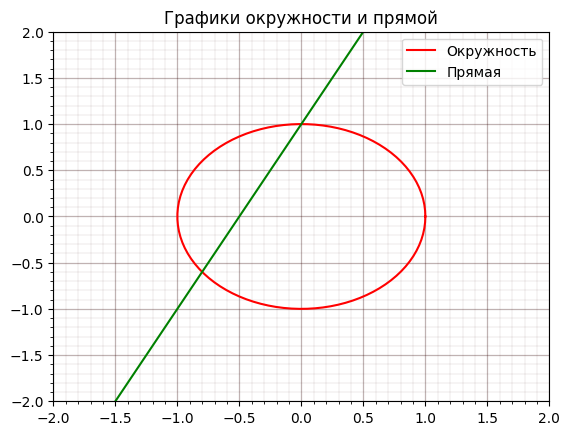

In [27]:
plt.xlim(-2,2)
plt.ylim(-2,2)

plt.plot(x_circle, y_circle, '-', color='red', label='Окружность')
plt.plot(x_lin, y_lin, '-', color='green', label='Прямая')
plt.title("Графики окружности и прямой")
plt.legend()


plt.grid(which='major', color='#300000', linewidth='0.9', alpha=0.3, linestyle='-')
plt.minorticks_on()
plt.grid(which='minor', color='#300000',linewidth='0.3',  alpha=0.2, linestyle='-')

## Задание 6. Решение уравнений

Самое важное для нас — увидеть, что прямая и окружность пересекаются в двух точках $A=(0,1)$ и $B=(-0.8, -0.6)$. Попробуем найти координаты этих точек как решение системы уравнений при помощи библиотеки SymPy.

Для этого нам нужно определить символы — буквы $x$ и $y$, фигурирующие в уравнениях, которые нам нужно совместно решить:
$\begin{cases}
x^2+y^2=1 \\
y=2x+1
\end{cases}$

Для этого воспользуемся объектами Symbol из библиотеки SymPy.

In [29]:
x = sympy.Symbol('x')
y = sympy.Symbol('y')

Далее нам нужно задать уравнения, которые нужно решать. Сначала определим уравнение окружности:

In [30]:
circle_eq = x**2 + y**2 - 1
circle_eq

x**2 + y**2 - 1

Как видите, вывод уравнения вновь достаточно красив. Определим точно так же уравнение для прямой. Для этого необходимо вспомнить, что функция Eq принимает два аргумента. Первый аргумент — это левая часть уравнения, а второй — правая.

In [32]:
line_eq = y - (2*x + 1)

После чего воспользуемся функцией solve, позволяющей решить систему уравнений. Первый аргумент — это список уравнений типа Eq, а второй аргумент — кортеж из переменных, относительно которых нужно решить уравнения. Вот как это можно сделать:

In [33]:
sympy.solve([circle_eq, line_eq], (x,y))

[(-4/5, -3/5), (0, 1)]

После запуска ячейки вы должны увидеть список из двух точек, которые соответствуют тем же самым точкам, что мы определили по графику.